### Praktikum Pengolahan Citra
### Tugas 05 Ekstraksi Fitur Warna
#### Nama : Wahyu Primayasa
#### Kelas : 2 D4 Teknik Informatika B
#### NRP : 2110191046

In [2]:
import numpy as np
import cv2 as cv2
from matplotlib import pyplot as plt

### Histogram Gray

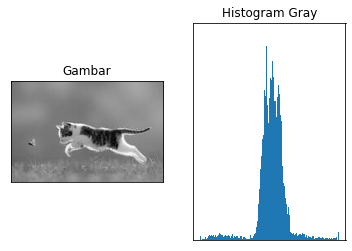

In [3]:
img = cv2.imread('kitten.jpg',0)

plt.subplot(121), plt.imshow(img, cmap = 'gray')
plt.title('Gambar'), plt.xticks([]), plt.yticks([])

plt.subplot(122), plt.hist(img.ravel(),256,[0,256])
plt.title('Histogram Gray'), plt.xticks([]), plt.yticks([])
plt.show()

### Histogram Colour

<ipython-input-4-3c35ca1f151b>:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1,2,2), plt.plot(histr,color = col)
<ipython-input-4-3c35ca1f151b>:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1,2,2), plt.plot(histr,color = col)


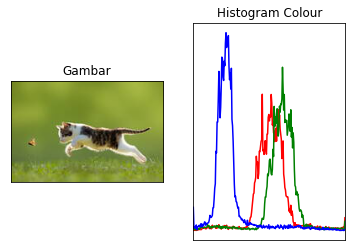

In [4]:
img = cv2.imread('kitten.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
color = ('r','g','b')

plt.subplot(1,2,1), plt.imshow(img)
plt.title('Gambar'), plt.xticks([]), plt.yticks([])

for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.subplot(1,2,2), plt.plot(histr,color = col)
    plt.xlim([0,256])
    plt.title('Histogram Colour'), plt.xticks([]), plt.yticks([])
plt.show()

# Histogram Colour

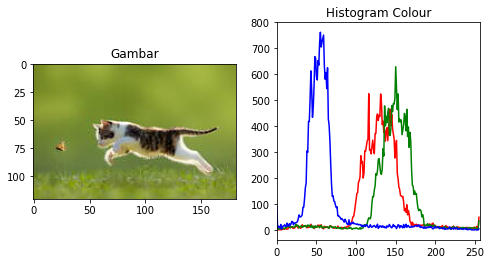

In [5]:
img = cv2.imread('kitten.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
color = ('r','g','b')

fig, ax = plt.subplots(nrows=1,
                       ncols=2,
                       figsize=(8,4))

ax[0].imshow(img)
ax[0].title.set_text('Gambar')

for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    ax[1].plot(histr,color = col)
    plt.xlim([0,256])
    ax[1].title.set_text('Histogram Colour')
plt.show()

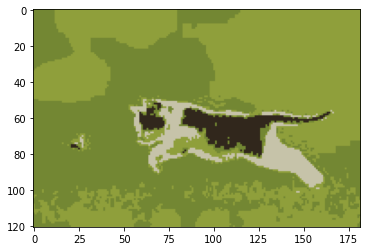

In [6]:
img = cv2.imread('kitten.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
Z = img.reshape((-1,3))
# convert to np.float32
Z = np.float32(Z)
# define criteria, number of clusters(K) and apply kmeans()
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 4
ret,label,center=cv2.kmeans(Z,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)
# Now convert back into uint8, and make original image
center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape((img.shape))
plt.imshow(res2)

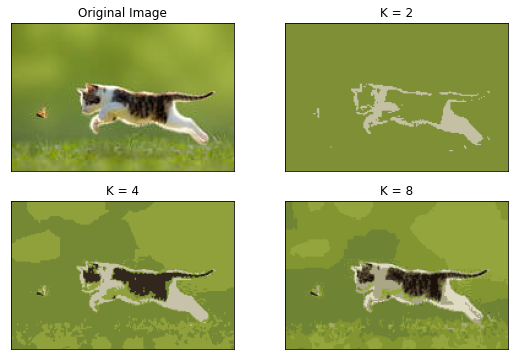

In [7]:
img = cv2.imread('kitten.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
Z = img.reshape((-1,3))
# convert to np.float32
Z = np.float32(Z)
# define criteria, number of clusters(K) and apply kmeans()
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

K = [2, 4, 8]
res2 = [img]
for i in range(3):
    ret,label,center=cv2.kmeans(Z,K[i],None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)
    # Now convert back into uint8, and make original image
    center = np.uint8(center)
    res = center[label.flatten()]
    res2.append(res.reshape((img.shape)))

titles = ['Original Image', 'K = 2', 'K = 4', 'K = 8']
plt.subplots(figsize=(9,6))
for i in range(4):
    plt.subplot(2, 2, i+1), plt.imshow(res2[i])
    plt.title(titles[i]), plt.xticks([]), plt.yticks([])
plt.show()